In [ ]:

import pandas as pd
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler


Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'd:\Python\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Frostens\\AppData\\Local\\Temp\\pip-install-ma__4b39\\sklearn_30df72a2794c4866bfabcb9e65d959aa\\setup.py'"'"'; __file__='"'"'C:\\Users\\Frostens\\AppData\\Local\\Temp\\pip-install-ma__4b39\\sklearn_30df72a2794c4866bfabcb9e65d959aa\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Frostens\AppData\Local\Temp\pip-pip-egg-info-s5wxvz_6'
         cwd: C:\Users\Frostens\AppData\Local\Temp\pip-install-ma__4b39\sklearn_30df72a2794c4866bfabcb9e65d959aa\
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than 'sklearn' for pip c

In [4]:
# Date; Time; Global_active_power; Global_reactive_power; Voltage; Global_intensity; Sub_metering_1; Sub_metering_2; Sub_metering_3
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)
print(dataset.head())

dataset.replace('?', np.nan, inplace=True)
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
# save updated dataset
dataset.to_csv('household_power_consumption.csv')


C:\Users\Frostens\AppData\Local\Temp\ipykernel_16324\4242775311.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
C:\Users\Frostens\AppData\Local\Temp\ipykernel_16324\4242775311.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
C:\Users\Frostens\AppData\Local\Temp\ipykernel_16324\4242775311.py:2: Us

(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

C:\Users\Frostens\AppData\Local\Temp\ipykernel_16324\361433423.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


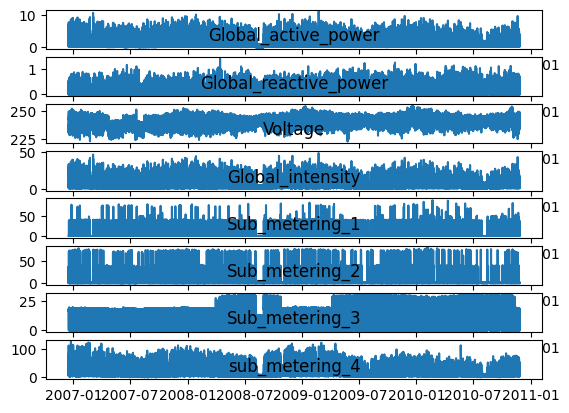

In [5]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# line plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	pyplot.plot(dataset[name])
	pyplot.title(name, y=0)
pyplot.show()

<ipython-input-10-0127fb0dc4bf>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


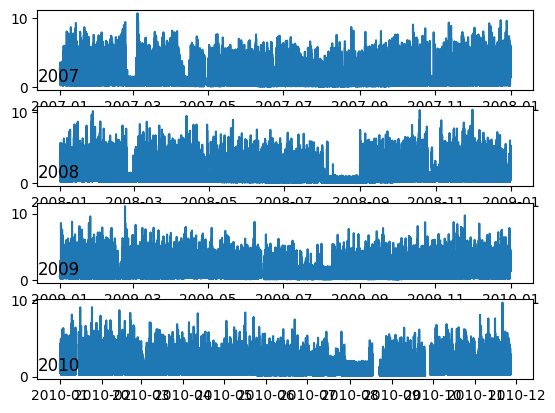

In [ ]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
pyplot.figure()
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset.loc[dataset.index.year == int(year)]
	# plot the active power for the year
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='left')
pyplot.show()

<ipython-input-13-9a97b94ce37f>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


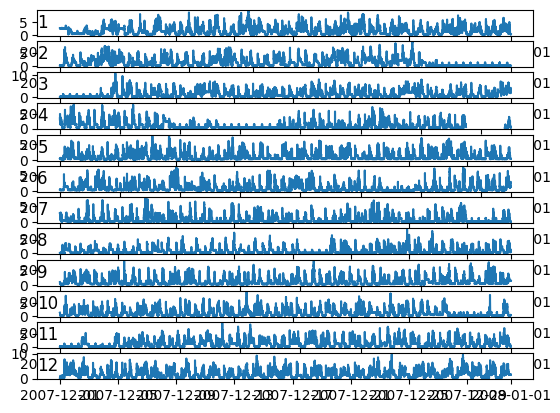

In [ ]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = months[i]
	# get all observations for the month
	result = dataset[(dataset.index.month == month) & (dataset.index.year == 2007)]
	# plot the active power for the month
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(month, y=0, loc='left')
pyplot.show()

<ipython-input-16-a93b440c9273>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


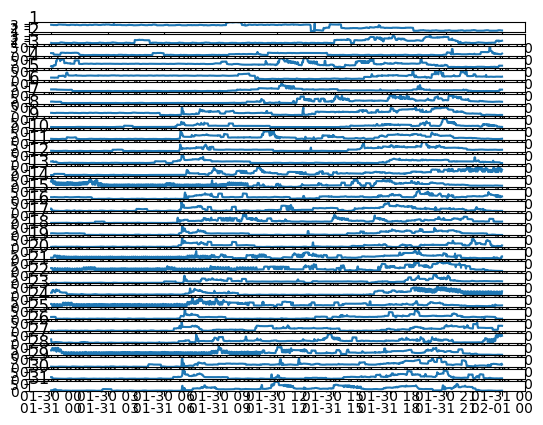

In [ ]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
days = [x for x in range(1, 32)]
pyplot.figure()
for i in range(len(days)):
	# prepare subplot
	ax = pyplot.subplot(len(days), 1, i+1)
	# determine the day to plot
	day = days[i]
	# get all observations for the day
	result = dataset[(dataset.index.day == day) & (dataset.index.month == 1) & (dataset.index.year == 2007)]
	# plot the active power for the day
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(day, y=0, loc='left')
pyplot.show()

<ipython-input-17-df0dd6df9084>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


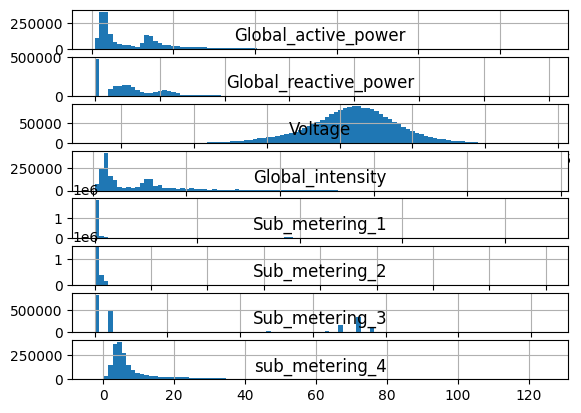

In [ ]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# histogram plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	dataset[name].hist(bins=100)
	pyplot.title(name, y=0)
pyplot.show()

<ipython-input-23-3bbacb0ec96c>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])


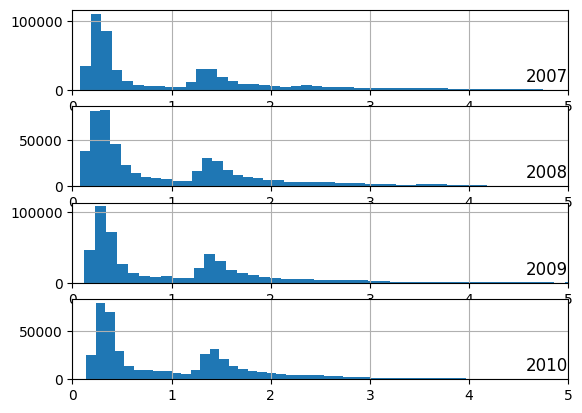

In [ ]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
years = [2007, 2008, 2009, 2010]
pyplot.figure()
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[dataset.index.year == year]
	# plot the active power for the year
	result['Global_active_power'].hist(bins=100)
	# zoom in on the distribution
	ax.set_xlim(0, 5)
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='right')
pyplot.show()

In [33]:
# Charger les données
data = pd.read_csv("household_power_consumption.csv", parse_dates=["datetime"], index_col="datetime")

# Afficher un aperçu

# Différenciation journalière (1440 minutes par jour)
data["Daily_diff"] = data["Global_active_power"].diff(1440)

# Différenciation annuelle (525600 minutes par an)
data["Annual_diff"] = data["Global_active_power"].diff(525600)

data["Daily_diff"].fillna(0, inplace=True)
data["Annual_diff"].fillna(0, inplace=True)


# Normaliser les colonnes sélectionnées
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[["Global_active_power", "Voltage", "Global_intensity"]])

# Ajouter les colonnes normalisées au DataFrame
data[["Global_active_power_norm", "Voltage_norm", "Global_intensity_norm"]] = scaled_data

data["hour"] = data.index.hour
data["day_of_week"] = data.index.dayofweek
data["month"] = data.index.month

# Exemple : Total des sous-comptages
data["sub_metering_total"] = (
    data["Sub_metering_1"]
    + data["Sub_metering_2"]
    + data["Sub_metering_3"]
    + data["sub_metering_4"]
)

# Sélection des colonnes pertinentes
final_data = data[["Global_active_power", "Daily_diff", "Voltage_norm", "hour", "day_of_week"]]

print(final_data[["Global_active_power", "Daily_diff", "Voltage_norm", "hour", "day_of_week"]].head(1500))

C:\Users\Frostens\AppData\Local\Temp\ipykernel_16324\3376751170.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Daily_diff"].fillna(0, inplace=True)
C:\Users\Frostens\AppData\Local\Temp\ipykernel_16324\3376751170.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

                     Global_active_power  Daily_diff  Voltage_norm  hour  \
datetime                                                                   
2006-12-16 17:24:00                4.216       0.000      0.376090    17   
2006-12-16 17:25:00                5.360       0.000      0.336995    17   
2006-12-16 17:26:00                5.374       0.000      0.326010    17   
2006-12-16 17:27:00                5.388       0.000      0.340549    17   
2006-12-16 17:28:00                3.666       0.000      0.403231    17   
...                                  ...         ...           ...   ...   
2006-12-17 18:19:00                4.536       1.684      0.359935    18   
2006-12-17 18:20:00                3.606       0.678      0.372536    18   
2006-12-17 18:21:00                3.594       0.654      0.367690    18   
2006-12-17 18:22:00                3.614       0.680      0.396123    18   
2006-12-17 18:23:00                3.612       0.686      0.395800    18   

           


Forecasting Hourly Consumption for the Next Day
MAE: 2.160257642794123e-08
RMSE: 3.569530137841658e-08


(datetime
 2010-04-18 19:27:00    1.714
 2010-04-18 19:28:00    1.692
 2010-04-18 19:29:00    1.716
 2010-04-18 19:30:00    1.714
 2010-04-18 19:31:00    1.692
                        ...  
 2010-11-26 20:58:00    0.946
 2010-11-26 20:59:00    0.944
 2010-11-26 21:00:00    0.938
 2010-11-26 21:01:00    0.934
 2010-11-26 21:02:00    0.932
 Name: Global_active_power, Length: 307140, dtype: float64,
 array([1.71400008, 1.69200006, 1.716     , ..., 0.93799998, 0.93400002,
        0.93200004]))